# Linear Regression with Scikit-learn
## Part one: Data Setup and Model training
* Previously, we explored "Is there a relationship between **total advertising spend** and **sales**"?
* Now we want to expand this to "What is the relationship between **each advertising channel (TV, Radio, Newspaper)** and **sales**"?

---
### Import environment and change background

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
mpl.rcParams.update({"figure.facecolor": "white"})

In [4]:
df = pd.read_csv(r"D:\Data Science\Course-2021\08-Linear-Regression-Models\Advertising.csv")

In [5]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


* Relationship between each column spend feature and sale label
* In the axes subplot -> scatterplot = `scatter`

Text(0.5, 1.0, 'Newspaper Spend')

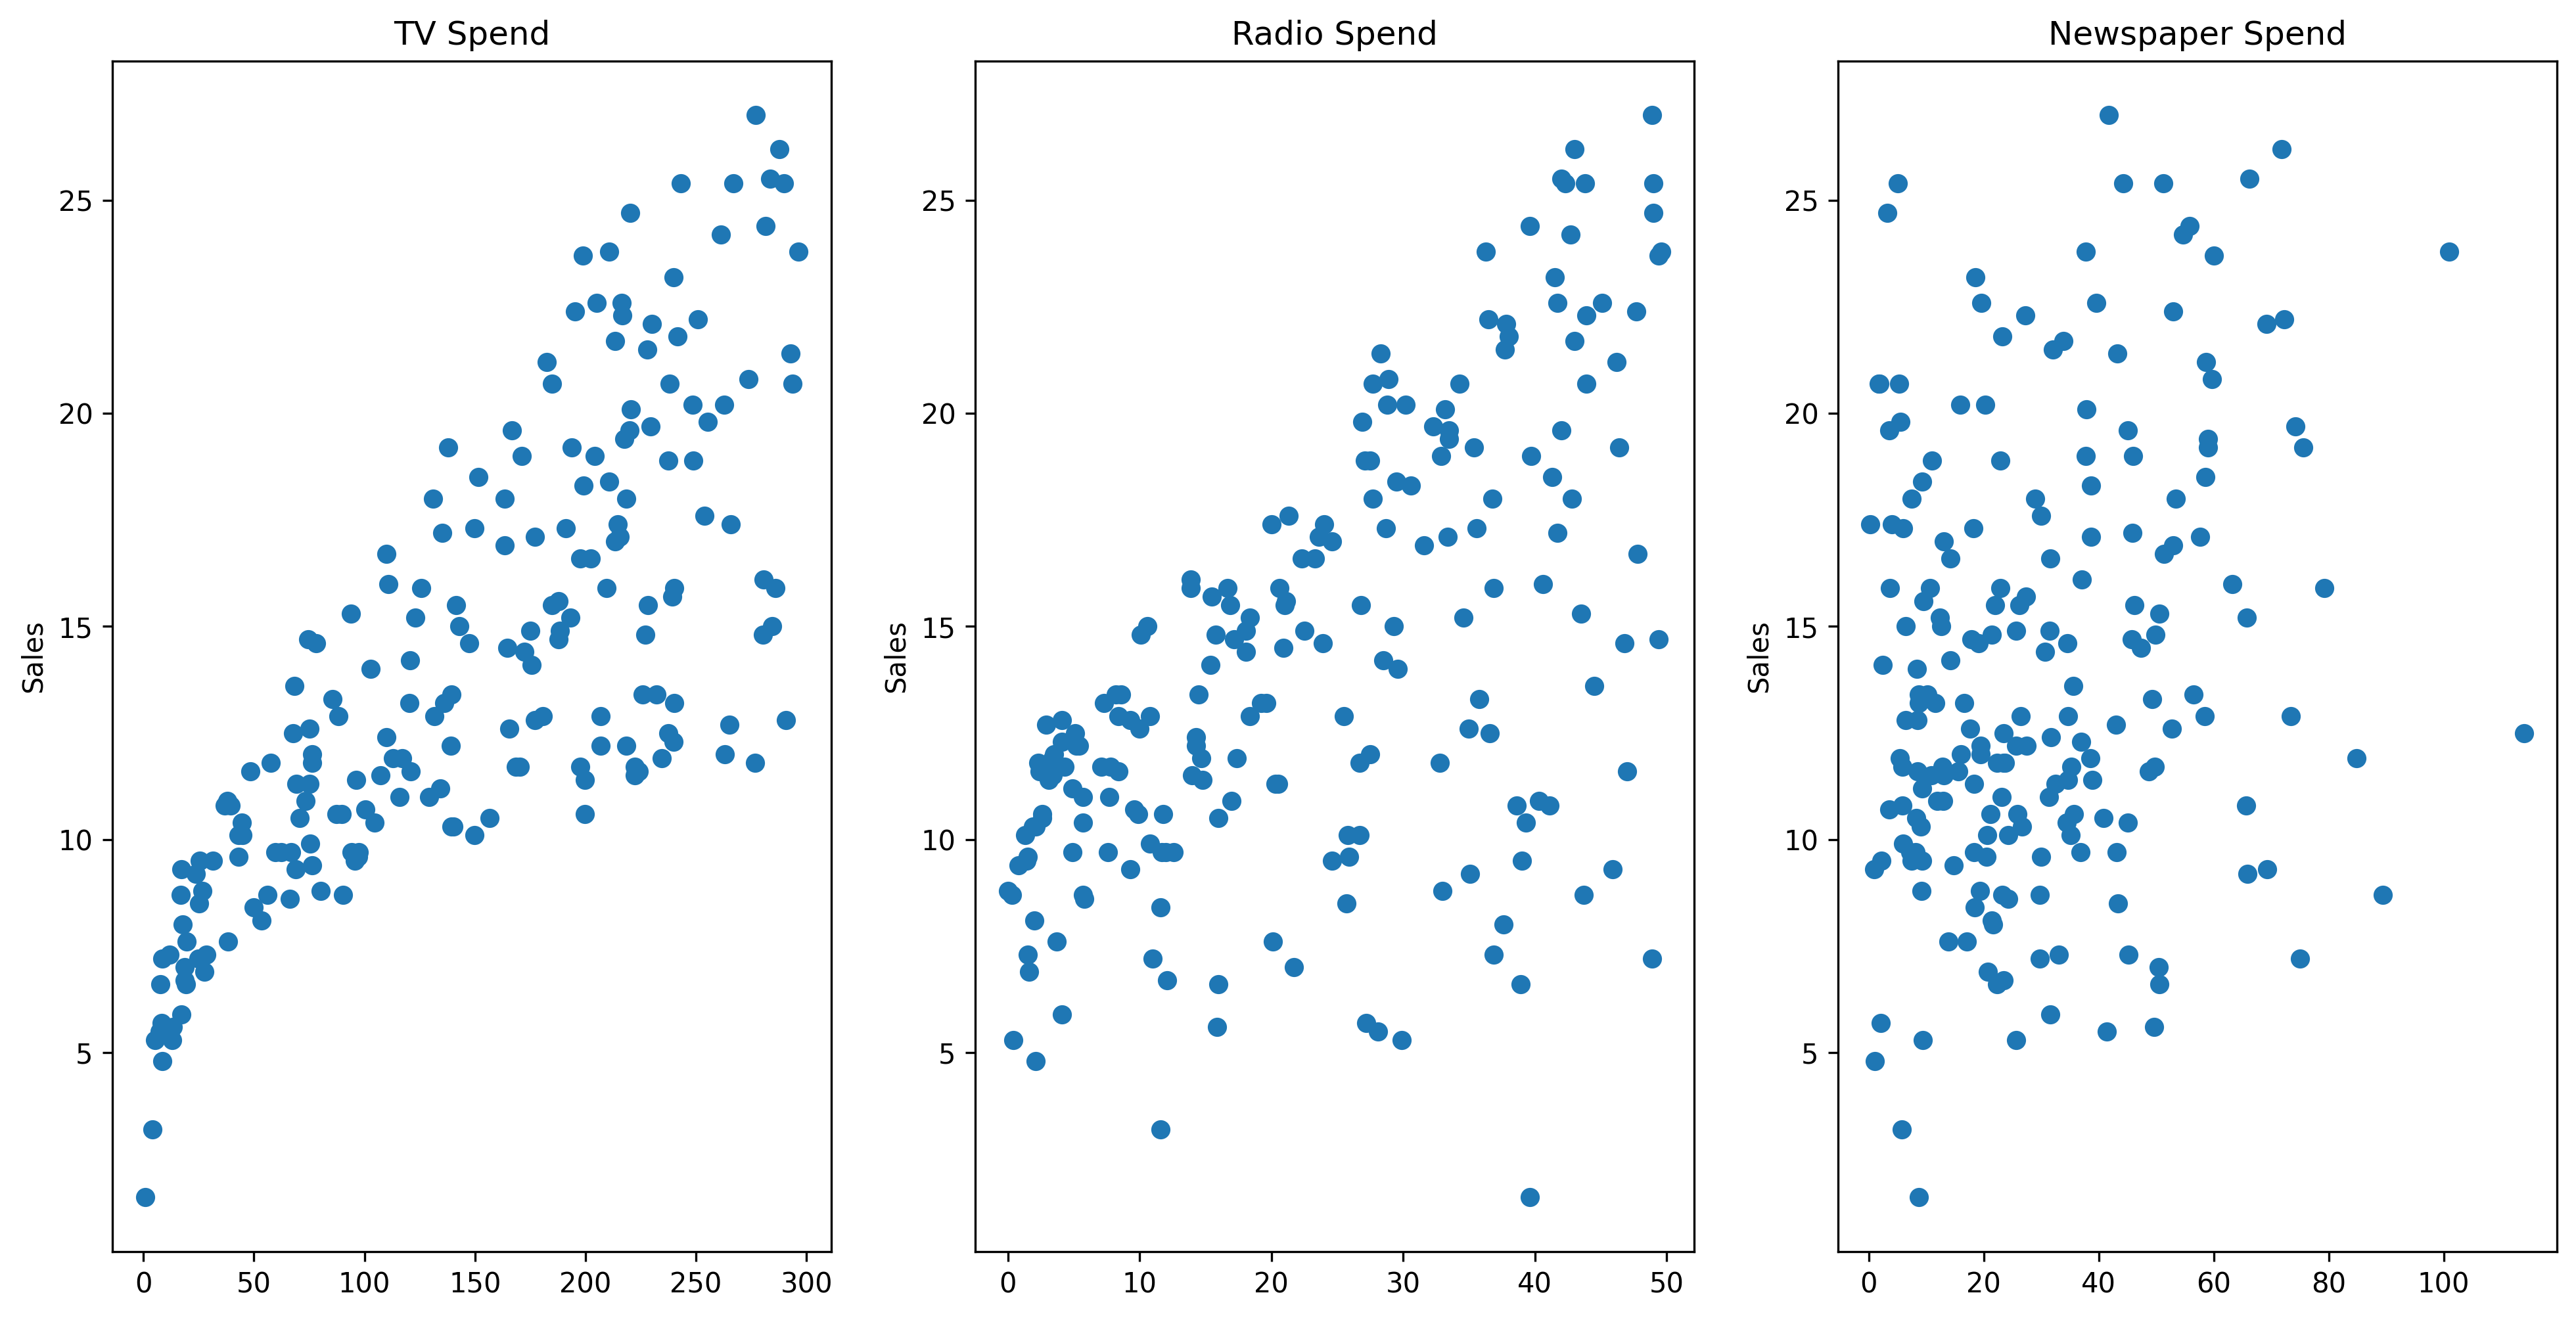

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,8), dpi =300)

ax[0].scatter(x="TV", y="sales", data=df)
ax[0].set_ylabel(ylabel="Sales")
ax[0].set_title("TV Spend")

ax[1].scatter(x="radio", y="sales", data=df)
ax[1].set_ylabel(ylabel="Sales")
ax[1].set_title("Radio Spend")

ax[2].scatter(x="newspaper", y="sales", data=df)
ax[2].set_ylabel(ylabel="Sales")
ax[2].set_title("Newspaper Spend")

<Figure size 4800x2400 with 0 Axes>

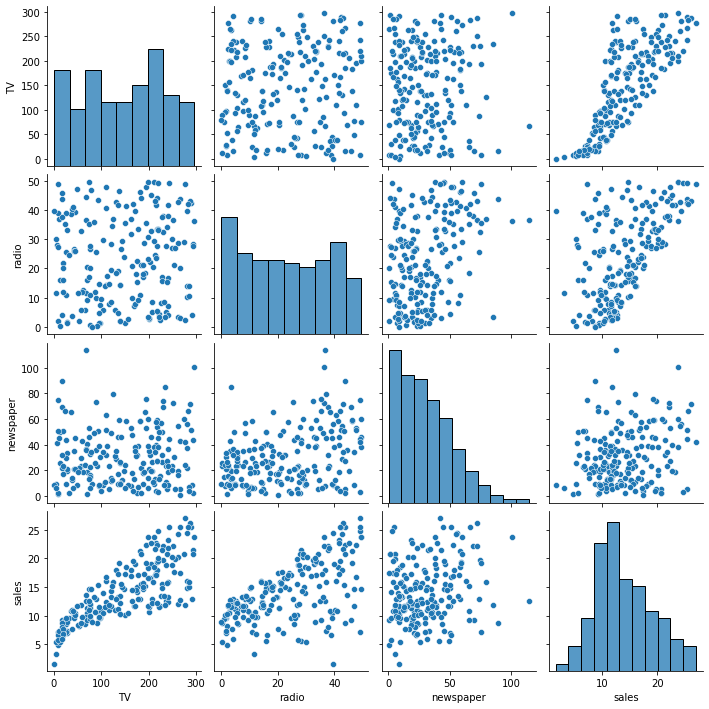

In [7]:
plt.figure(figsize=(16,8), dpi=300)
sns.pairplot(data=df)

* Run the Linear Regression

In [8]:
X = df.drop(labels="sales", axis=1)

In [9]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [10]:
y = df["sales"]

In [11]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [14]:
X_train

,TV,radio,newspaper
85,193.2,18.4,65.7
183,287.6,43.0,71.8
127,80.2,0.0,9.2
53,182.6,46.2,58.7
100,222.4,4.3,49.8
...,...,...,...
63,102.7,29.6,8.4
70,199.1,30.6,38.7
81,239.8,4.1,36.9
11,214.7,24.0,4.0


In [15]:
X_test

,TV,radio,newspaper
37,74.7,49.4,45.7
109,255.4,26.9,5.5
31,112.9,17.4,38.6
89,109.8,47.8,51.4
66,31.5,24.6,2.2
119,19.4,16.0,22.3
54,262.7,28.8,15.9
74,213.4,24.6,13.1
145,140.3,1.9,9.0
142,220.5,33.2,37.9


In [16]:
y_test

37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
119     6.6
54     20.2
74     17.0
145    10.3
142    20.1
148    10.9
112    14.1
174    11.5
55     23.7
141    19.2
149    10.1
25     12.0
34      9.5
170     8.4
39     21.5
172     7.6
153    19.0
175    27.0
61     24.2
65      9.3
50     11.4
42     20.7
129     9.7
179    12.6
2       9.3
12      9.2
133    19.6
90     11.2
22      5.6
41     17.1
32      9.6
125    10.6
196     9.7
158     7.3
180    10.5
16     12.5
186    10.3
144    11.4
121     7.0
80     11.8
18     11.3
78      5.3
48     14.8
4      12.9
15     22.4
1      10.4
43     12.9
102    14.8
164    11.9
9      10.6
155     3.2
36     25.4
190    10.8
33     17.4
45     14.9
Name: sales, dtype: float64

In [17]:
y_train

85     15.2
183    26.2
127     8.8
53     21.2
100    11.7
       ... 
63     14.0
70     18.3
81     12.3
11     17.4
95     16.9
Name: sales, Length: 140, dtype: float64

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
linear_model = LinearRegression()

In [20]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [21]:
test_y_pre = linear_model.predict(X_test)

In [22]:
test_y_pre

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

## Performance evaluation
### Regression Metrics
* Now that we have a fitted model that can perform predictions based on features, how do we decide if those predictions are any good?
* Fortunately we have the known test labels to compare our results to.
* Let's take a moment now to discuss evaluating Regression Models.
* Regression is a task when a model attempts to predict continuous values (unlike categorical values, which is classification)
* For example, attempting to predict the price of a house given its features is a **regression task**.
* Attempting to predict the country a house is in given its features would be a classification task
* You may have heard of some evaluation metrics like **accuracy** or **recall**
* These sort of metrics aren't useful for regression problems, we need metrics designed for *continuous* values
* Let's discuss some of the most common evaluation metrics for regression:
    * Mean absolute error (MAE)
        * This is the mean of the absolute values of errors
        * Easy to understand
            * $\frac{1}{n}\sum_{i=1}^n|y_i-\hat{y}_i|$
            * Understand how far off are my actual predictions?
        * MAE won't punish large errors  however
        * We want our error metrics to account for large errors even just a few points
    * Mean squared error
        * Larger errors are "punished" more than with MAE, making MSE more popular
        * $\frac{1}{n}\sum_{i=1}^n(y_i-\hat{y}_i)^2$
        * When you squared it, the overall effects on the average of few point large errors is really far off
        * Issue with MSE:
            * Different units than y
            * It reports units of y squared
            * Report back how far you off from your squared x not x
    * Root mean square error
        * Solve the problem of Mean square error
        * Get the root of the squared errors after everything it's done
        * This is the root of the mean of the squared errors
        * Most popular (has same units as y)
        * Similar to standard deviation instead of reporting back variance
        * $\sqrt{\frac{1}{n}\sum_{i=1}^n(y_i-\hat{y}_i)^2}$
        * Context is everything
        * A RMSE of $10 is fantastic for predicting the price of a house, but horrible for predicting the price of a candy bar!
        * With the RMSE = 10 dollar that's a horrible error because you are way outside the range of typical candy bars
        * Compare your error metric to the average value of the label in your data set to try to get an intuition of its overall performance
        * Domain knowledge also plays an important role here!
        * Context of importance is also necessary to consider
            * We may create a model to predict how much medication to give, in which case small fluctuations in RMSE may actually be very significant
            * If we create a model to try to improve on existing human performance, we would need some baseline RMSE to compare to
* The metrics shown here apply to any regression task, not just Linear Regression!

In [23]:
test_y_pre

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

* The mean of the sales
* We need to compare the mean of sales and the `mean absolute error` and `mean squared error`

In [24]:
df["sales"].mean()

14.0225

<AxesSubplot:xlabel='sales', ylabel='Count'>

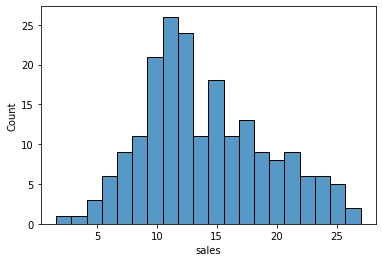

In [25]:
sns.histplot(data=df["sales"], bins=20)

* **Mean absolute error**

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [27]:
MAE = mean_absolute_error(y_true=y_test, y_pred=test_y_pre)

In [28]:
MAE

1.213745773614481

In [29]:
MSE = mean_squared_error(y_true=y_test, y_pred=test_y_pre)

In [30]:
MSE

2.2987166978863782

In [31]:
RMSE = np.sqrt(MSE)

In [32]:
RMSE

1.516151937599388

### We need to base on historical model or the current results
* `mean_absolute_error` doesn't take into account situations where my model could be really far off a few points
* `mean_squared_error` cannot directly compare to the mean because this is now in squared terms of mean square error
* In order to solve the correct the data, we need to consider both root of mean_square_error(RMSE) and mean_absolute_error
* Consider the `mean_absolute_error` to ensure on the average the model is good
* Consider the root of `mean_squared_error` to make sure I'm not super far off for just a few data points

---
## Residual plots
* Often for Linear Regression it is  a good idea to separately evaluate residuals $(y-\hat{y})$ and not just calculate performance metrics (e.g. RMSE)
* Recall Anscombe's quartet - Clearly linear Regression is not suitable -> but we only could do this by using the one $x$ feature
* But how can we tell if we're dealing with more than one $x$ features?
* We can not see this discrepancy of fit visually if we have multiple features!
* **What we could do is plot residual error against true y values**

In [33]:
residuals = y_test - test_y_pre

In [34]:
residuals

37    -1.041313
109    0.189374
31     0.451111
89    -0.308198
66     0.327143
119   -0.412483
54    -0.089925
74    -0.299540
145    0.524155
142    0.878058
148   -1.505032
112    0.207650
174   -2.225411
55     2.412060
141    0.775434
149    0.118016
25    -3.552290
34     1.810863
170    0.843850
39     1.096888
172   -0.192152
153    0.757859
175    2.313681
61     1.378009
65     1.320379
50    -1.252073
42    -0.769259
129    1.647714
179    0.176840
2     -3.207197
12    -1.577578
133    0.355399
90     1.129731
22    -1.107800
41    -0.214921
32     1.832357
125    1.346067
196    1.421653
158   -3.281056
180   -0.135911
16    -0.510026
186    0.528079
144    1.185301
121   -1.045720
80     0.232893
18     1.216320
78    -3.698066
48    -1.453889
4     -0.339423
15     1.585066
1     -2.097274
43    -1.066159
102   -2.762851
164    0.754630
9     -1.962615
155   -2.308703
36     2.105349
190   -1.824097
33    -1.374000
45    -0.287857
Name: sales, dtype: float64

* Compare the `rediduals`  with the `y_test`

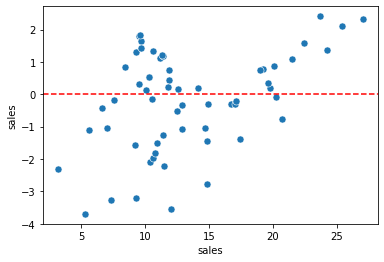

In [35]:
sns.scatterplot(x=y_test, y=residuals, s=50)
plt.axhline(y=0, color="r", ls="--" )

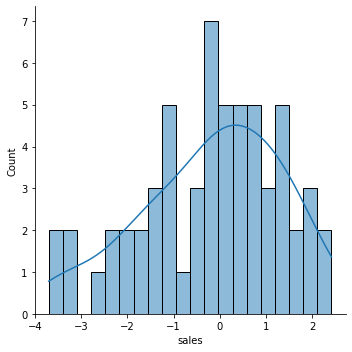

In [36]:
sns.displot(residuals, bins=20, kde=True)

* The normal probability plot that actually allows you to compare what a perfectly normally distributed dataset would look like against your actual values

In [37]:
import scipy as sp
from scipy import stats

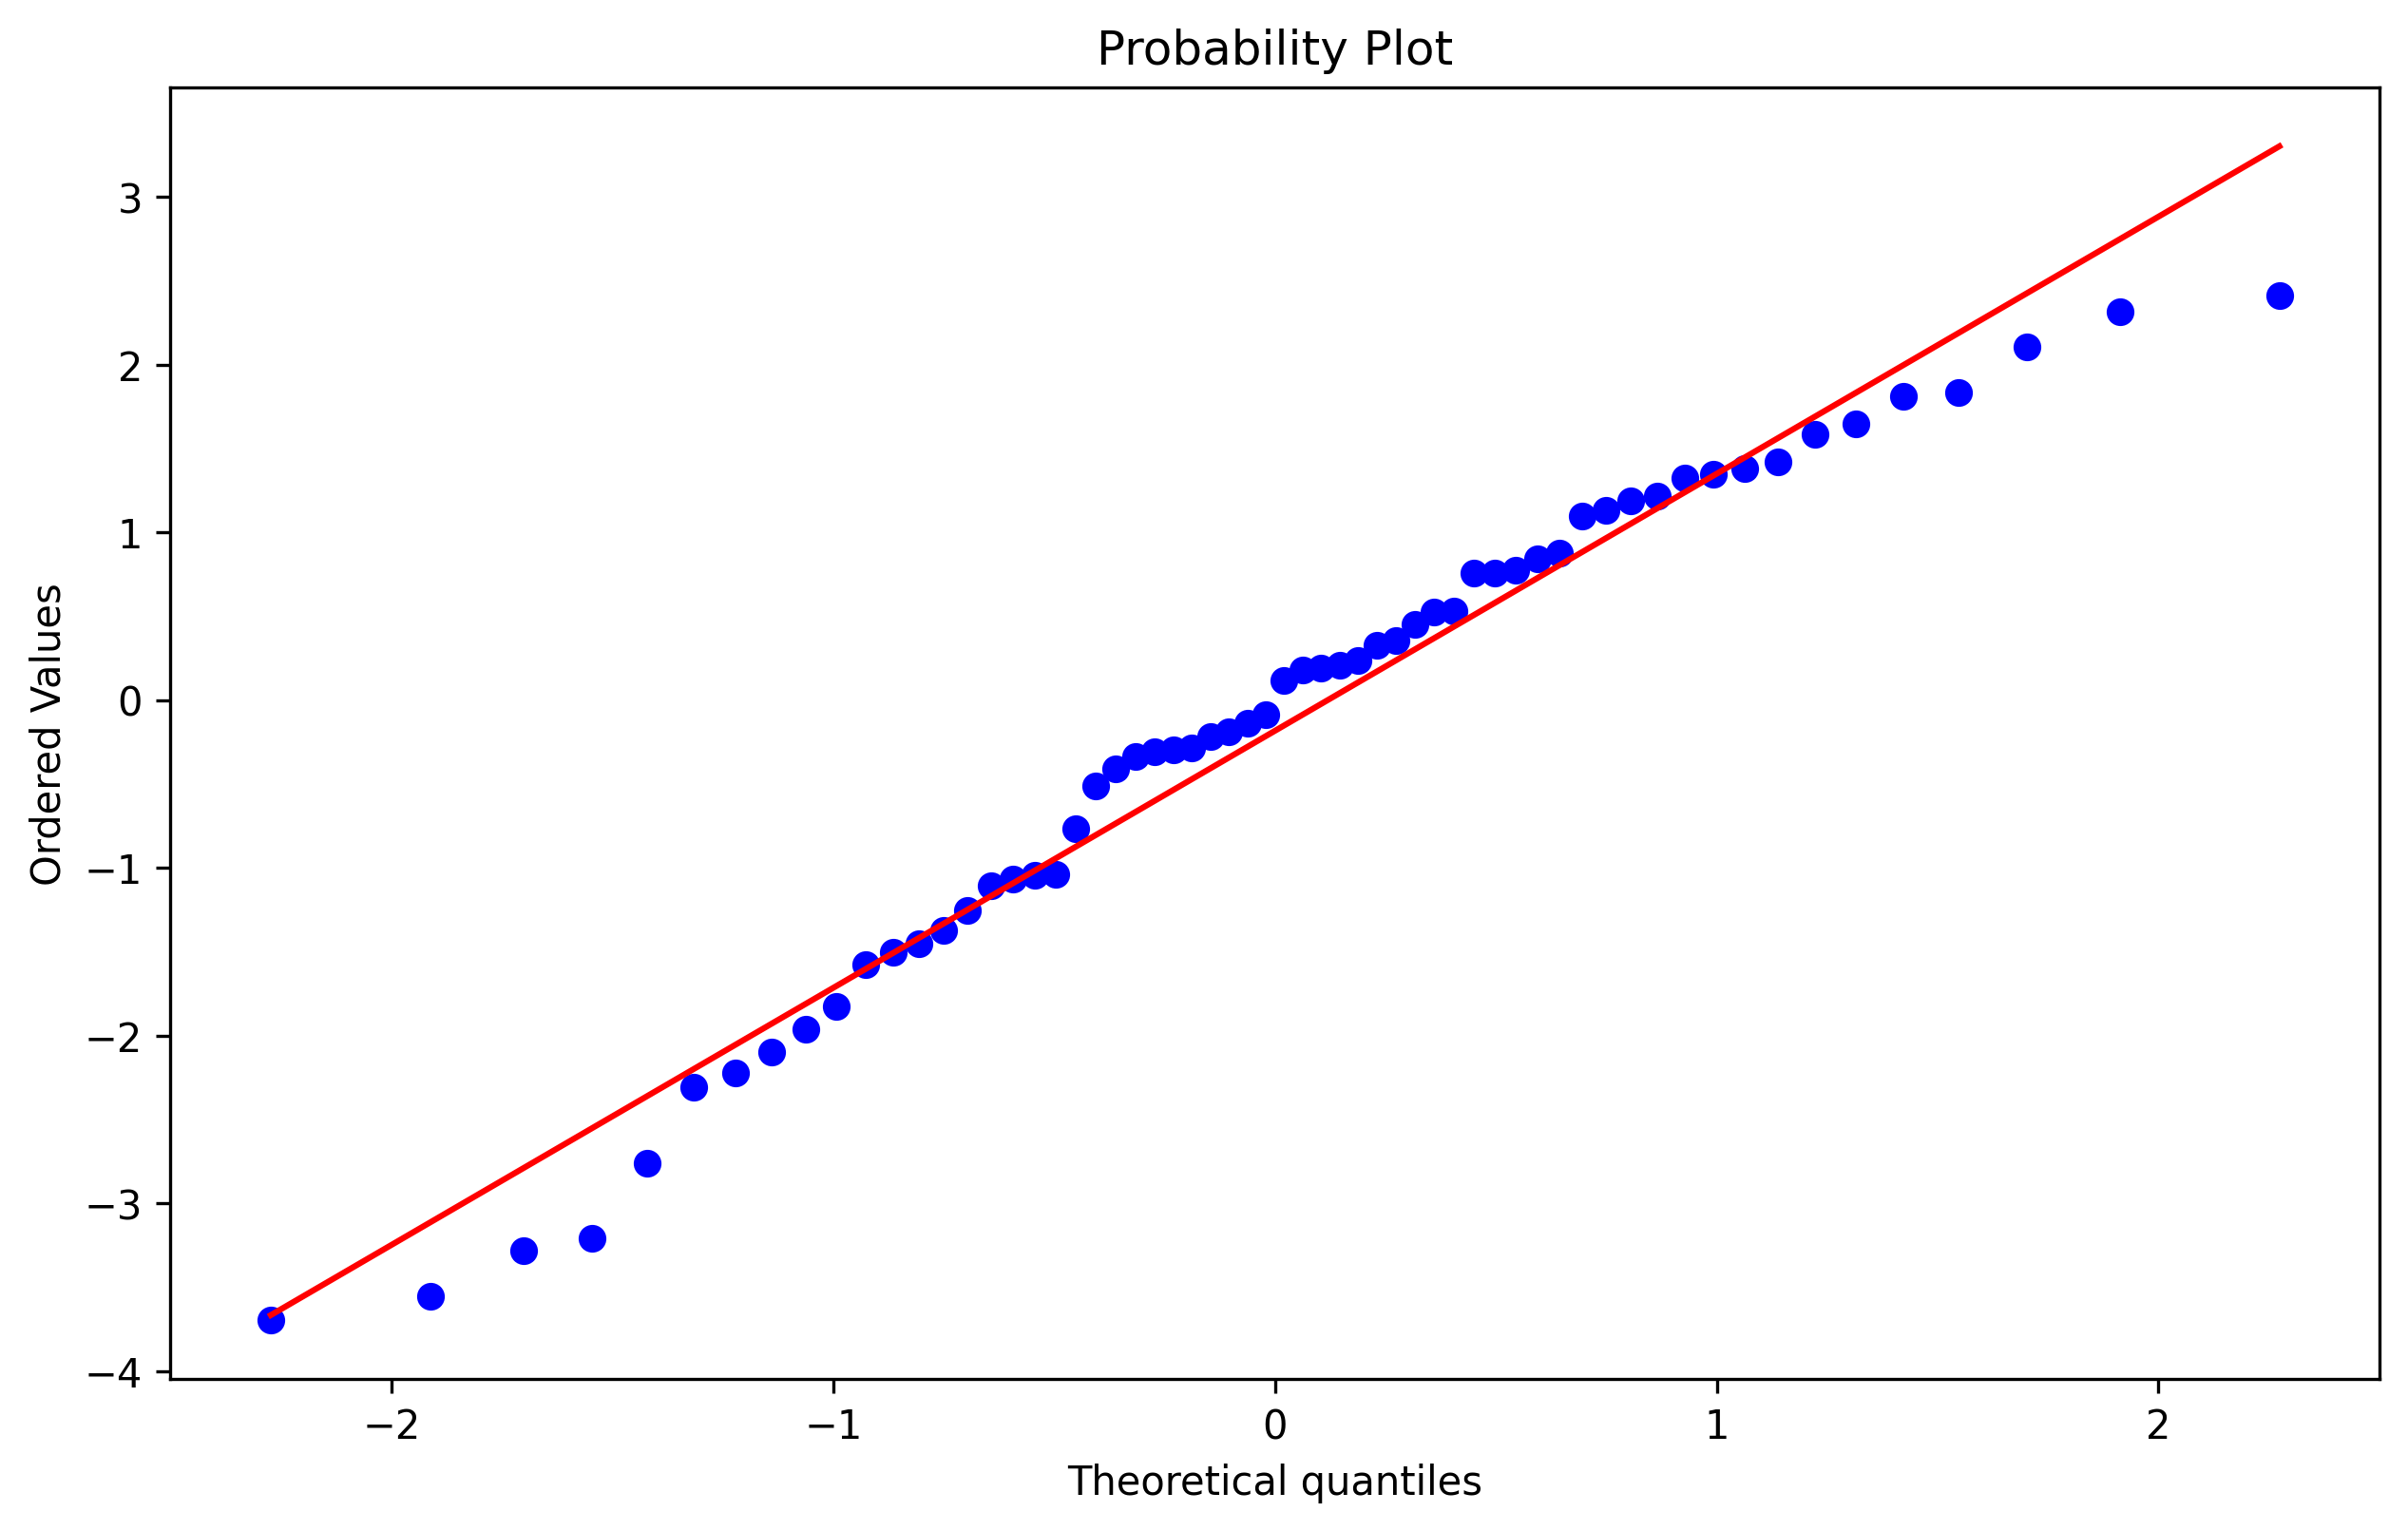

In [38]:
fig, ax = plt.subplots(figsize=(10,6), dpi=300)
_ = sp.stats.probplot(x=residuals, plot=ax)

## Linear Regression - Model Deployment and Coefficient Interpretation
* Later on we will explore polynomial regression and regularization as model adjustments
* For now, let's focus on a simple "deployment" of our model by saving and loading it, then applying to new data


In [39]:
final_model = LinearRegression()

In [40]:
final_model.fit(X, y)

LinearRegression()

In [41]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

* Every 1 unit of TV spend will lead to increase 0.045 sale values
* Every 1 unit of Radio spend will lead to increase 0.189 sale values
* Every 1 unit of newspapers spend will lead to decrease -0.001 sale values



* Compare your regression prediction versus the true feature values

In [42]:
y_hat = final_model.predict(X)

Text(0.5, 1.0, 'Newspaper Spend')

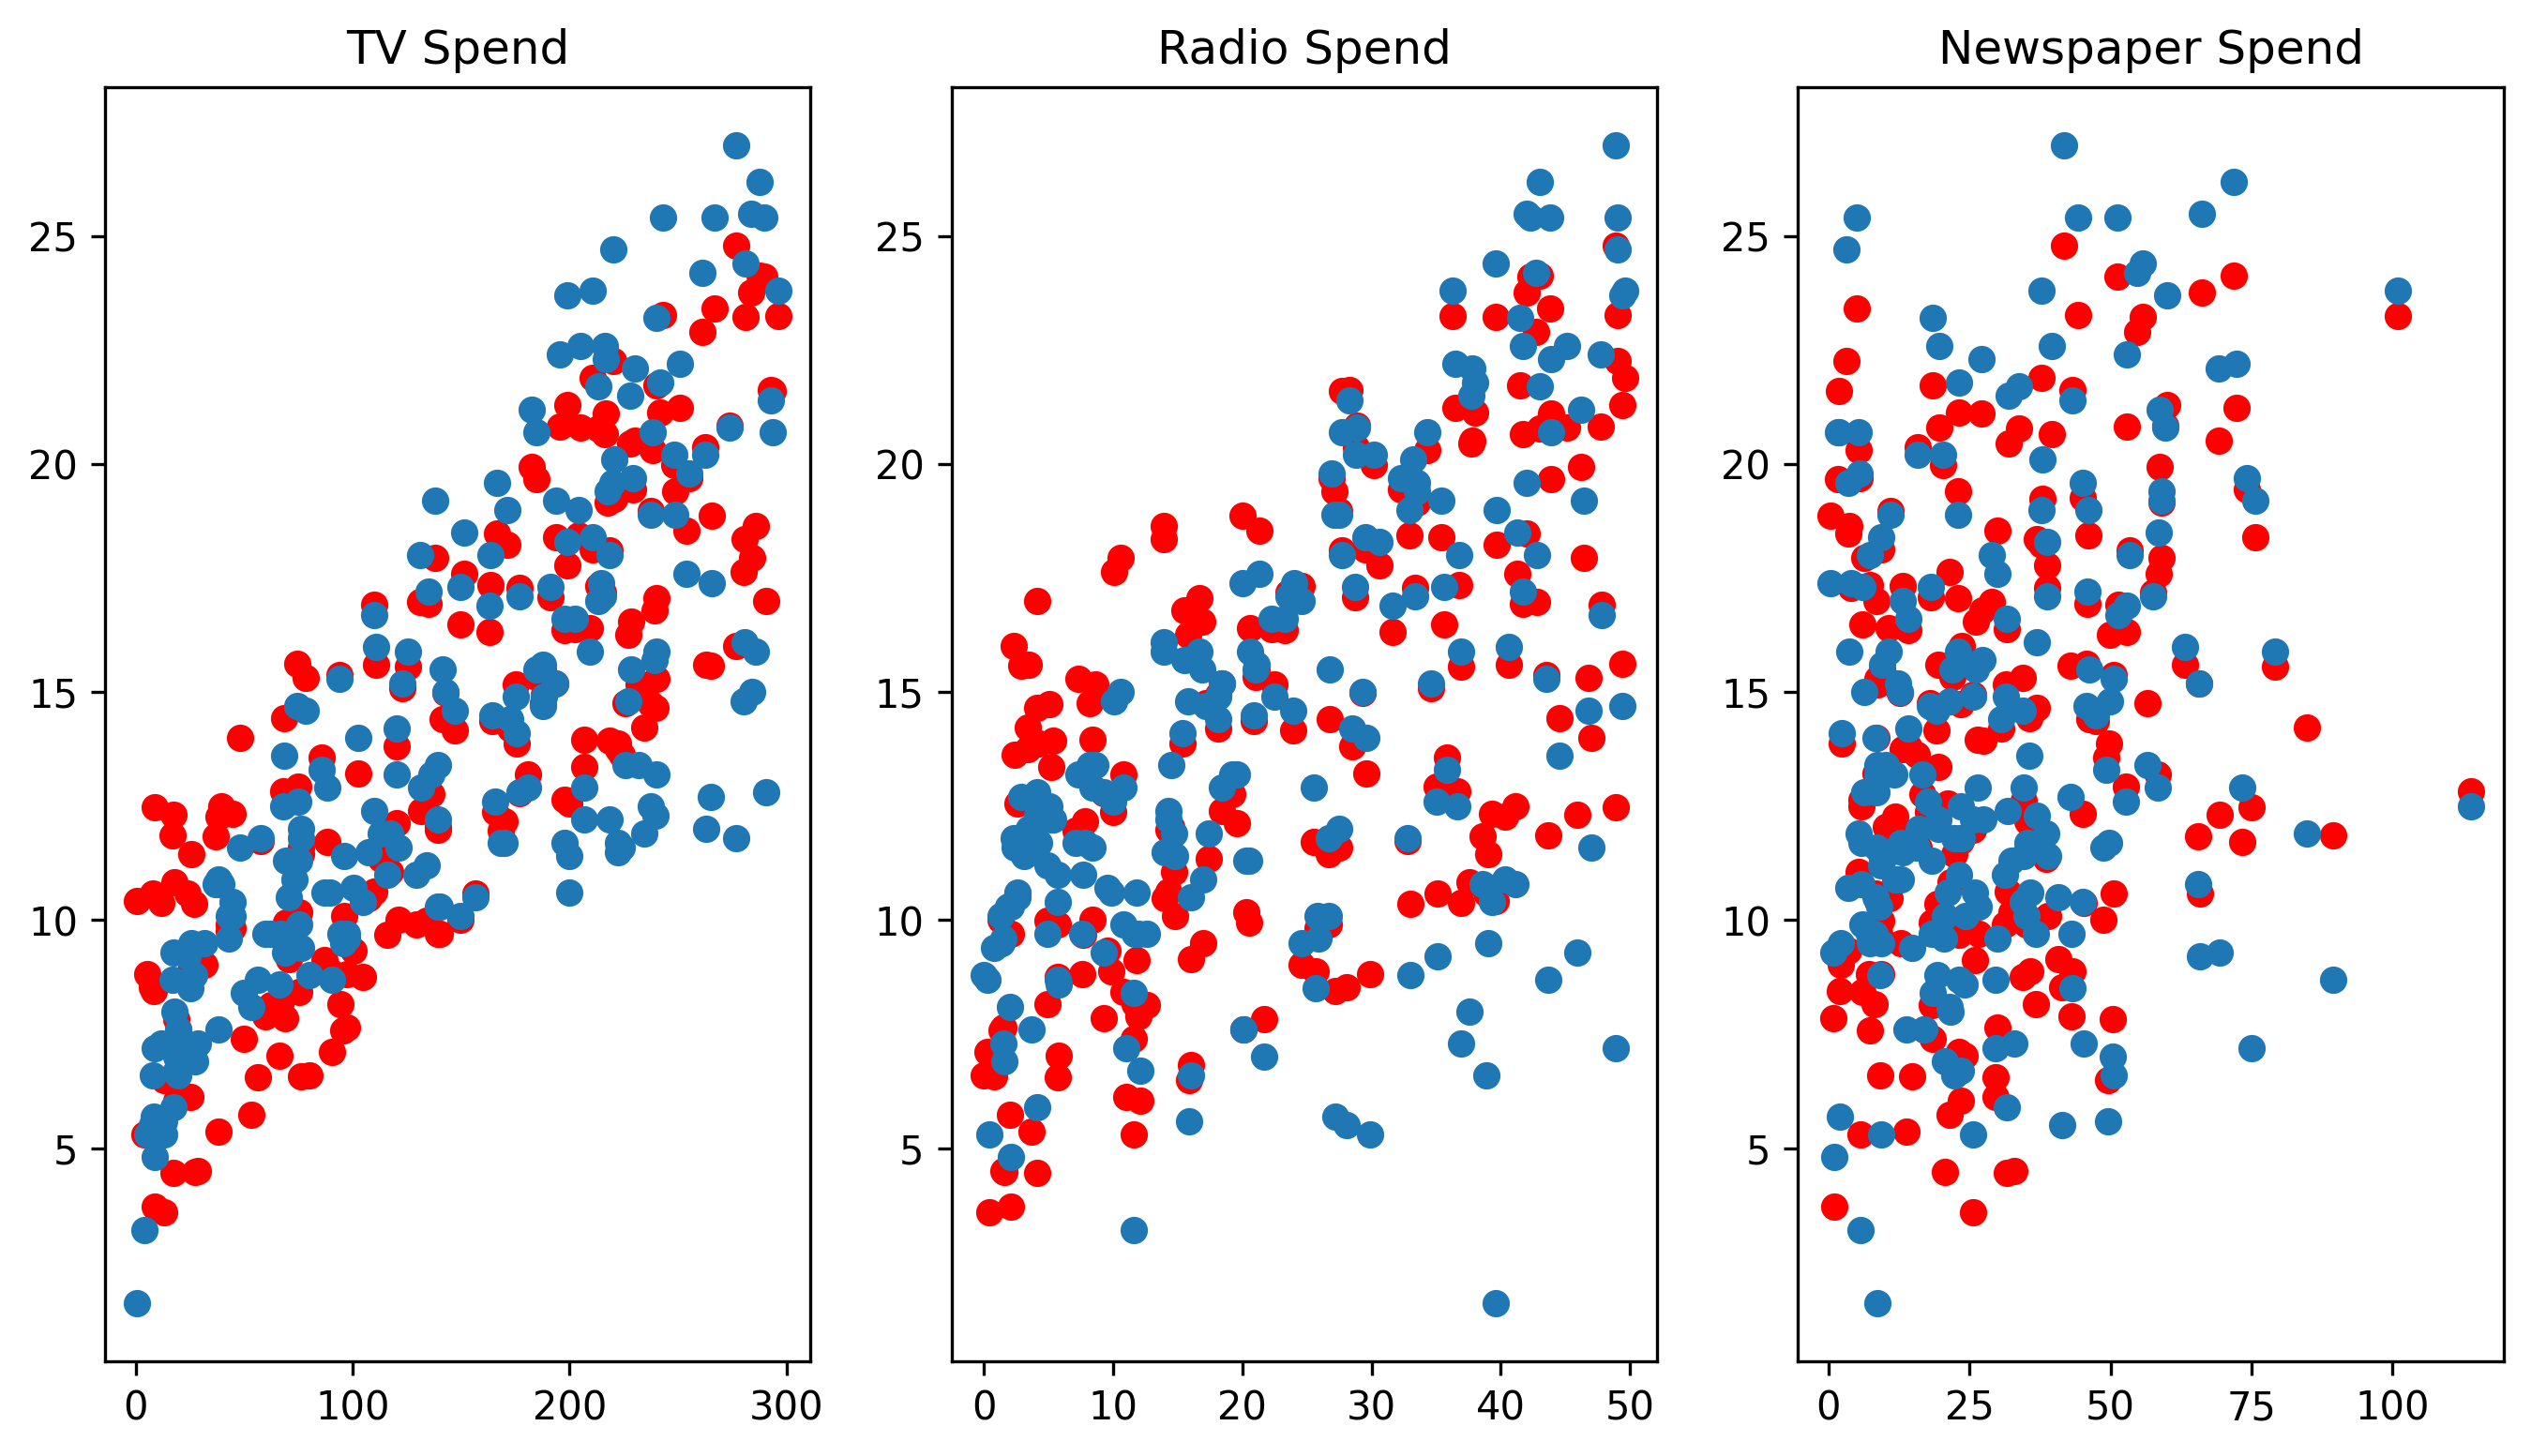

In [43]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(11,6), dpi=300)

ax[0].plot(df["TV"], y_hat, "o", color="r")
ax[0].plot(df["TV"], y, "o")
ax[0].set_title(label="TV Spend")

ax[1].plot(df["radio"], y_hat, "o", color="r")
ax[1].plot(df["radio"], y, "o")
ax[1].set_title(label="Radio Spend")

ax[2].plot(df["newspaper"], y_hat, "o", color="r")
ax[2].plot(df["newspaper"], y, "o")
ax[2].set_title(label="Newspaper Spend")

* <b>In reality, we need to normalize the number of each data column first before you even start training the model</b>
---
## Save and load the model

In [44]:
from joblib import dump, load

* Save the model

In [45]:
dump(final_model,filename="final_sales_model_practice.joblib")

['final_sales_model_practice.joblib']

* Load the model

In [46]:
load_model = load(filename="final_sales_model_practice.joblib")

In [47]:
load_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [48]:
campaign = [[149, 22, 12]]

In [49]:
load_model.predict(campaign)

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])

# Polynomial Regression
## Theory and Motivation
* There are two issues polynomial regression will address for us:
    * Non-linear feature relationships to label
    * Interaction terms between features
* Let's first explore non-linear relationships and how considering polynomial orders could help address this

* Imagine a feature that is not linear
<img src="https://www.statology.org/wp-content/uploads/2021/04/loglogPython1-768x530.png">

* We know log(x) is not linear relationship
* What is a feature X behaved like log(X)?
* Will be difficult to find a linear relationship
* What about the square of this feature? => The relationship could be more linear
* Even more so for higher orders, such as third powers
* Keep in mind this is an exaggerated example, and not every feature will have  relationships at higher order
* The main point here is to show it could be reasonable to solve for a single linear Beta coefficient for polynomial of an original feature

* Let's now also consider **interaction terms**
* What if features are only significant when **in sync** with one another
* For example:
    * Perhaps newspaper advertising spend by itself is not effective, but greatly increase effectiveness if added to a TV advertising campaign
    * Consumers only watching a TV ad will create some sales, but consumers who watch TV **and** are later "reminded through a news paper ad could contribute even more sales than TV or newspaper alone!
* How we check for this ?
    * The simplest way is to create a new feature that multiples two existing features together to create an **interaction term**
    * We can keep the original features, and add on this **interaction term**
* Fortunately Scitkit-Learn does this for us easily through a **preprocessing** call.
* Scikit-Learn's preprocessing library contains many useful tools to apply to the original data set **before** model training
* One tool is the **PolynomialFeatures** which automatically creates both higher order feature polynomials and the interaction terms between all feature combinations.
* The features created include:
    * The bias (the value of 1.0)
    * Values raised to power for each degree (e.g. $x^1, x^2 , x^3$...)
    * Interactions between all pairs of features (e.g. $x1*x2, x1*x3$)
* Converting Two Features **A** and **B** into 2 order Polynomial Features
    * <b>$1, A, B, A^2, AB, B^2$</b>
* Generalized terms of features **$X_1$** abd **$X_2$**
    * <b>$1, X_1, X_2, X_1^2, X_2^2, X1X2$</b>
* Example if row was **$X_1$** = 2 and **$X_2$** = 3
    * 1, 2, 3, 4, 6, 9
* There is no guarantee that there are actually signals within interaction term or higher order relationship

In [50]:
df = pd.read_csv(filepath_or_buffer=r"D:\Data Science\Course-2021\08-Linear-Regression-Models\Advertising.csv")

In [51]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [52]:
X = df.drop(labels="sales", axis=1)

In [53]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [54]:
y = df["sales"]

In [55]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [56]:
from sklearn.preprocessing import PolynomialFeatures

In [57]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

In [58]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [59]:
polynomial_converter.transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [60]:
polynomial_converter.transform(X).shape

(200, 9)

In [61]:
X.shape

(200, 3)

In [62]:
polynomial_feature = polynomial_converter.transform(X)

In [63]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [64]:
polynomial_feature[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

* The first three value of the polynomial_feature are the same as original X data
* The next value is the square of TV - the first value(230.1 * 230.1)
* The following 2 values is the interaction term between TV and other columns (230.1 * 37.8.2 = 8697.78, 230.1 * 69.2 = )
* The following value is the square of radio  ($37.8^2$ = 1428)
* The following value is the interaction term of radio and newspaper 15922.92, 37.8 * 69.2 = 2615
* The following value is the square of newspaper ($69.2^2$ = 4788.6 )

* The combination between the `transform` and  `fit`

In [65]:
polynomial_converter.fit_transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

# Training and Evaluation model
* We also need to save the polynomial regression, not just model because the campaign only has 3 features why the model require 9 features

#### Perfrom the train test split

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(polynomial_feature, y, test_size=0.3, random_state=101)

In [68]:
X_train

array([[1.93200e+02, 1.84000e+01, 6.57000e+01, ..., 3.38560e+02,
        1.20888e+03, 4.31649e+03],
       [2.87600e+02, 4.30000e+01, 7.18000e+01, ..., 1.84900e+03,
        3.08740e+03, 5.15524e+03],
       [8.02000e+01, 0.00000e+00, 9.20000e+00, ..., 0.00000e+00,
        0.00000e+00, 8.46400e+01],
       ...,
       [2.39800e+02, 4.10000e+00, 3.69000e+01, ..., 1.68100e+01,
        1.51290e+02, 1.36161e+03],
       [2.14700e+02, 2.40000e+01, 4.00000e+00, ..., 5.76000e+02,
        9.60000e+01, 1.60000e+01],
       [1.63300e+02, 3.16000e+01, 5.29000e+01, ..., 9.98560e+02,
        1.67164e+03, 2.79841e+03]])

In [69]:
model_polynomial = LinearRegression()

In [70]:
model_polynomial.fit(X_train, y_train)

LinearRegression()

* Test prediction for the X_test

In [71]:
model_polynomial.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [72]:
test_poly_pre = model_polynomial.predict(X_test)

* Calculate the errors

In [73]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [74]:
MAE = mean_absolute_error(y_true=y_test, y_pred=test_poly_pre)

In [75]:
MAE

0.48967980448035886

In [76]:
MSE = mean_squared_error(y_true=y_test, y_pred=test_poly_pre)

In [77]:
MSE

0.44175055104033895

In [78]:
RMSE = np.sqrt(MSE)

In [79]:
RMSE

0.6646431757269

* Those values are more good than the Linear Regression ( Remember to test the same test size, random_state with the Linear Regresison)
    * Linear Regression
        * MAE: 1.213
        * RMSE: 1.516
    * Polynomial Regression
        * MAE: 0.4896
        * RMSE: 0.6646

* coef_ of the polynomial regression
* Need to base on `polynomial_features` to see what coefficient belongs to what type of data (original features, interation term feature or square feature)

In [80]:
model_polynomial.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [81]:
polynomial_feature[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [82]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

#### Bias-Variance Trade Off (Overfitting versus Underfitting)
* **Very important topic**

* We have seen that a higher order polynomial model performs significantly better than a standard linear regression model
* But how can we choose the optimal degree for the polynomial?
* What the trade-offs are we to consider as we increase model complexity
* In general, increasing model complexity in search for better performance leads to a **Bias-Variance trade-off**
* We want to have a model that can generalize well to new unseen data, but can also accout for variance and patterns in the known data
* Extreme bias or extreme variance both lead to bad models
* We can visualize this effect by considering a model that underfits (high bias) or a model that overfits (high variance)
* Let's start with a model that overfits to a dataset...


* **Overfitting**
    * **Variance** indicates how much the estimates of the target function will alter if different training data were used. In other words, variance describes how much a random variable differs from its expected value
    * The model fits too much to the **noise** from the data
    * This often results in **low error on training sets but high error on test/validation sets**
    * Sometime, the overfitting can be little hard to catch because you may think your model's performance well in training data set but not in test set data
    * Consider the following overfitting data
        * <img src="https://www.datarobot.com/wp-content/uploads/2018/03/Screen-Shot-2018-03-22-at-11.22.15-AM-e1527613915658.png">
        * What is the error on the training data here?
        * You notice that the model is hitting every single point => when calculate the MAE and MSE, RMSE => get training error of zero => mislead you in the fitting model
        * But what about on a new unseen data point?
        * Overfitting can cause large test errors!
        * <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTytHm2HONNTAxGx2fTHtltREciUCmctWYru6gYA6waapzZVjCOdBhdSObclLyp3c0AkAo&usqp=CAU">
    * Model is fitting too much to noise and variance in the training data
    * Model will perform very well on training data, but have poor performance on new unseen data.


* **Underfitting**
    * Model does not capture the underlying trend of the data and does not fit the data well enough.
    * **Low variance but high bias.**
    * underfitting is often a result of an excessively simple model
    * Model has high bias and is generalizing too much
    * Underfitting can lead to poor performance in both traning and testing data sets
    * Bias **describes how well a model matches the training set**.  Bias is the amount that a model’s prediction differs from the target value, compared to the training data.
    * <img src="https://docs.aws.amazon.com/machine-learning/latest/dg/images/mlconcepts_image5.png">

* **Overfitting and Underfitting**
    * This data was easy to visualize (only has one X feature), but how can we see underfitting and overfitting when dealing with multidimensional data sets?
    * First let's imagine we trained a model and then measured its **error versus model complexity** (e.g. higher order polynomials)
    * **model complexity** is a general term that is going to apply more than just polynomial
    *  model complexity often refers to the number of features or terms included in a given predictive model, as well as whether the chosen model is linear, nonlinear, and so on. It can also refer to the algorithmic learning complexity or computational complexity
    * model complex => that mean it's a higher order polynomial
    * Good model
        * Increase the model comlexity => lower the errors
        * In the polynomial case => increase the polynomial degree => lower the error
        * <img src="https://media.springernature.com/original/springer-static/image/chp%3A10.1007%2F978-3-030-47439-3_7/MediaObjects/492262_1_En_7_Fig2_HTML.png">
    * Bad model
        * Increase the error => increase the model complexity
    * When thinking about **overfitting and underfitting** we want to keep in mind the relationship of model performance on the training set versus the test/validation set
    * Let's imagine we split our data into **training set** and **test set**
        * Try to decide what complexity of model is most appropriate, what polynomial degree should I choose?
        * We first see performance on the training set
            * Increase the model comlexity => lower the errors. Eventually, you are increasing your moral complexity so that your model is capturing every single piece of noise and variance in your training data set
        * Now, we can't use this by itself to choose the correct moral complexity
        * Next we check performance on the test set (if overfit too much on the training test => we would eventually perform poorly on the test set)
        * Ideally the model would perform well on both, with similar behavior
        * But what happpens if we overfit on the training data? that means we would perform poorly on new test data!
        * This is good indication too much complexity, you should look for the point to determine appropriate values!
        * For certain algrithms this test error jump can be sudden isntead of gradual
        * This means when deciding optimal model complexity **and** wanting to fairly evaluate our model's performance, we can consider both the train error and test error to select an ideal complexity
        * In the case of Polynomial Regression, complexity directly relates to degree of the polynomial, but many machine learning algoithms have their own hyperparameters that can increase complexity
        * <img src="https://i.stack.imgur.com/rpqa6.jpg">

# Adjusting model parameters
* Let's explore choosing the optimal model complexity (order of polynomial)
* As we previously discussed, we will need to understand error for both training and test data to look out for potential overfitting

* Can we improve the performance by **increasing the degree** of the polynomial to an even higher number, like a third degree or even fourth degree polynomial
* Well we can do is just simply create a **loop** that creates all those models for the various polynomial degree, train them, calculate the error metrics for both out training data and out test data
* Then visually see where we begin to  (sudden large increase) on the test error and where we continue to decline on the training error

* The process of multiple degree of the polynomial:
    * Create the different order poly
    * Split poly feat train/test
    * fit on train
    * Store/save the RMSE for both the train AND test
    * Plot the results (error and poly order)

* Create list to store the test and train set

In [83]:
test_mae = []
test_rmse = []
train_mae = []
train_rmse = []

* The larger the range you test, the more degrees you take into account

In [84]:
for d in range(1,10):
    polynomial_converter = PolynomialFeatures(degree=d, include_bias=False)
    polynomial_feature = polynomial_converter.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(polynomial_feature, y, test_size=0.3, random_state=101)
    model_polynomial = LinearRegression()
    model_polynomial.fit(X_train, y_train)
    train_mul_poly_pre = model_polynomial.predict(X_train)
    test_mul_poly_pre = model_polynomial.predict(X_test)
    RMSE_test = np.sqrt(mean_squared_error(y_true= y_test, y_pred=test_mul_poly_pre))
    RMSE_train = np.sqrt(mean_squared_error(y_true= y_train, y_pred=train_mul_poly_pre))
    test_rmse.append(RMSE_test)
    train_rmse.append(RMSE_train)

* You should don't overcome the spike point

In [85]:
train_rmse

[1.734594124329376,
 0.5879574085292234,
 0.43393443569020695,
 0.3517083688399345,
 0.25093429203443857,
 0.19397956253436668,
 5.421548536515169,
 0.14281430849698556,
 0.1719282016506676]

* As you can see that if you overcome the spike point and the rmse of train data still low => the test data show the different point of view.

In [86]:
test_rmse

[1.5161519375993877,
 0.6646431757269,
 0.5803286825216851,
 0.5077742636722449,
 2.575818175027777,
 4.318761965217181,
 1379.5295413992226,
 3910.2091466276274,
 94237.7187453714]

* After increase the degree of polynomial, the train RMSE decrease
* After increase the degree of polynomial, around 4 degree the test RMSE increase significantly

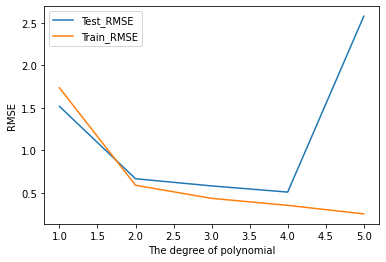

In [87]:
plt.plot(range(1,6), test_rmse[0:5], label="Test_RMSE")
plt.plot(range(1,6), train_rmse[0:5], label="Train_RMSE")

plt.xlabel("The degree of polynomial")
plt.ylabel("RMSE")
plt.legend()

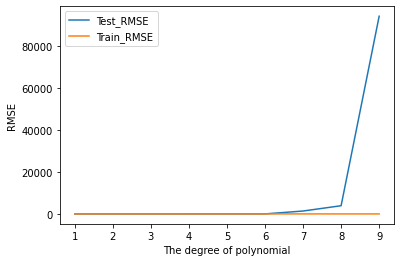

In [88]:
plt.plot(range(1,10), test_rmse, label="Test_RMSE")
plt.plot(range(1,10), train_rmse, label="Train_RMSE")

plt.xlabel("The degree of polynomial")
plt.ylabel("RMSE")
plt.legend()

* We choose both good training set and test set
* We should choose the value before the break down point (the point that spiking) to avoid the

# Model Deployment


In [103]:
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)

In [104]:
final_poly_feature = final_poly_converter.fit_transform(X)

In [105]:
X_train, X_test, y_train, y_test = train_test_split(final_poly_feature, y, test_size=0.3, random_state=101)

In [106]:
final_poly_model = LinearRegression()

* Fit on the final model with the X values are transformed

In [109]:
final_poly_model.fit(final_poly_feature, y)

LinearRegression()

In [110]:
final_poly_model.coef_

array([ 8.96744296e-02,  3.87306507e-02,  1.40116785e-02, -4.39852533e-04,
        1.38525353e-03, -2.11551525e-04, -5.78622015e-04, -3.39038010e-04,
        2.30693236e-04,  7.62775843e-07, -1.21636828e-06,  7.24494002e-07,
        1.79932497e-06, -1.51021227e-06, -1.14841391e-07,  3.32749144e-06,
        4.93904244e-06,  2.67349509e-06, -2.30514930e-06])

In [111]:
final_poly_pred = final_poly_model.predict(X_test)

In [112]:
final_poly_pred

array([14.66604832, 19.22602307, 12.54024178, 17.32583644,  8.09070088,
        6.67318662, 20.0680429 , 17.14799487, 10.36372911, 19.64904199,
        9.79073642, 13.95442949, 11.5336319 , 22.97991215, 18.99767236,
        9.48106783, 12.27172543,  9.39835007,  8.67245989, 21.23451218,
        6.810915  , 19.24488046, 27.34344849, 24.36915977,  9.44562549,
       11.3301264 , 21.12198507,  9.49976253, 12.4643974 ,  8.59682537,
        8.70526428, 19.69043418, 10.86921678,  6.55734691, 18.02572281,
        9.5729147 , 10.67527096,  9.89234803,  7.05505001, 10.70487537,
       12.44879662, 10.44533828, 11.51360037,  7.31955462, 11.96117289,
       10.77544525,  5.46667021, 15.1405429 , 12.92558288, 22.36128314,
       10.76944735, 12.72221257, 14.83507268, 12.24846316, 11.13217917,
        4.81116008, 25.17126112,  9.98638386, 17.42616748, 15.47092435])

* Save the `final_poly_model` and `final_poly_converter`

In [113]:
from joblib import dump, load

In [114]:
dump(value=final_poly_model, filename="final_poly_model_practice.joblib")

['final_poly_model_practice.joblib']

In [118]:
dump(value=final_poly_converter, filename="final_poly_converter_practice.joblib")

['final_poly_converter_practice.joblib']

In [119]:
load_poly_model = load(filename="final_poly_model_practice.joblib")

In [120]:
load_poly_converter = load(filename="final_poly_converter_practice.joblib")

In [121]:
campaign = [[149, 22, 12]]

In [123]:
transform_data = load_poly_converter.fit_transform(campaign)

In [125]:
load_poly_model.predict(transform_data)

array([14.64501014])